<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import pprint as pprint
import csv
from collections import defaultdict

columns = defaultdict(list) # each value in each column is appended to a list

with open('./sat_scores.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k
reader
dict ={}
dict['State'] = columns['State']
dict['Rate'] = columns['Rate']
dict['Verbal'] = columns['Verbal']
dict['Math'] = columns['Math']
pprint.pprint(dict, width =2000)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', '

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df = pd.DataFrame(dict)
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [77]:
df.info()

#Luckily, there are no null values in the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
diff      52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [5]:
sat_file = './sat_scores.csv'
df = pd.read_csv(sat_file)
df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
#Through converting a dictionary to DF, the columns in the DataFrame are of type object. Wheras, using read.csv would gives us int type. 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df.head(10)

# Verbal and math scores ranges around 400-500+. Rate ranges from 60 to 80. 

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
#check for null values 
df.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data = {}
data['type'] = {'State' : df['State'].dtype, 'Rate' : df['Rate'].dtype, 'Math' : df['Math'].dtype, 'Verbal' : df['Verbal'].dtype}
data['description'] = {'State' : 'State indicates the State data is representing', 'Rate' : 'Probably Attendance rate', 'Math': 'Math score', 'Verbal' : 'Verbal score'}
data['shape'] = df.shape


data

{'type': {'State': dtype('O'),
  'Rate': dtype('int64'),
  'Math': dtype('int64'),
  'Verbal': dtype('int64')},
 'description': {'State': 'name of state',
  'Rate': 'scores',
  'Math': 'math score',
  'Verbal': 'verbal score'},
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\Clare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


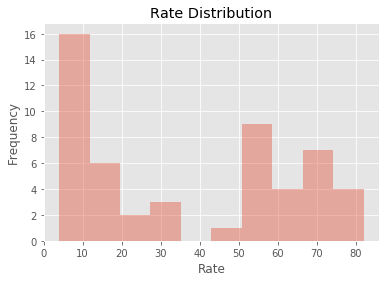

In [93]:
import seaborn as sns
sns.distplot(df['Rate'], kde=False, bins= 10)
plt.title('Rate Distribution')     #Create a title
plt.ylabel('Frequency')          # Give y-axis a label
plt.show()
#Rate is not normally distributed 

C:\Users\Clare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


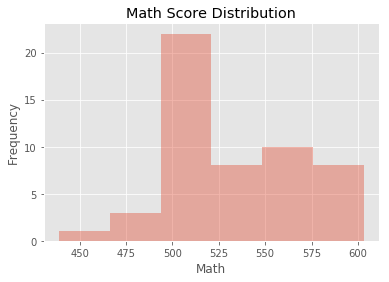

In [92]:
import seaborn as sns
sns.distplot(df['Math'], kde=False)
plt.title('Math Score Distribution')     ## Creating the title
plt.ylabel('Frequency')          ## Give y-axis a label
plt.show()
#Math is not normally distributed 

C:\Users\Clare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


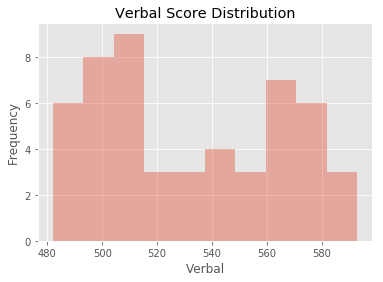

In [91]:
import seaborn as sns
sns.distplot(df['Verbal'], kde=False, bins= 10)
plt.title('Verbal Score Distribution')      ## Creating the title
plt.ylabel('Frequency')                     ## Give y-axis a label
plt.show()

#Verbal is not normally distributed 

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

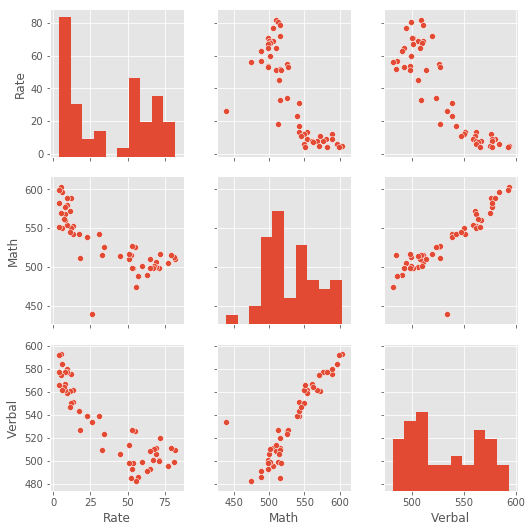

In [87]:
plt.style.use('ggplot')        ## Using the ggplot preset style
sns.pairplot(df[['Rate','Math','Verbal']])

#Insights
# There is a negative correlation between Verbal and Rate.
# There is a negative correlation between Math and Rate.
# There is a positive correlation between Math and Verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

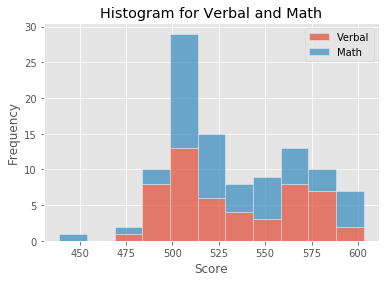

In [94]:
df[['Verbal','Math']].plot.hist(alpha =0.7, stacked=True, bins=11, edgecolor='white')
plt.xlabel('Score')         
plt.title('Histogram for Verbal and Math')
plt.show()
#There is a similar distribution for Verbal and Math. E.g. most of the scores lies between 500 to 510. 

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5,1,'Boxplot for Math and Verbal')

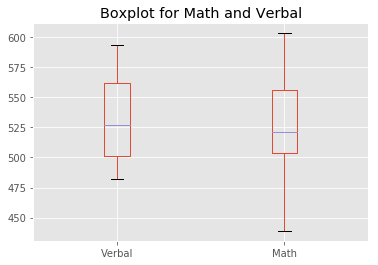

In [95]:
df[['Verbal','Math']].plot.box().set_title('Boxplot for Math and Verbal')

#Using boxplox is clearer to see the distribution of the variables (max, median, min). 
#A histogram is more suitable to observe the distribution of the veriable.
#Scatter plots show how much one variable is affected by another which is not the purpose of this since we are looking at the distribution. 

#The Variable, Rate is not of the same units as Math and verbal. I wouldn't plot them on the same chart 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


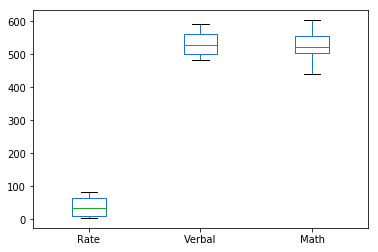

In [16]:
df.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
lista = df[df['Verbal'] > df['Verbal'].mean()]['State']
df_a = pd.DataFrame(lista)

df_a.head()
#len(lista) =24
#Out of 52 rows, there are 27 states less than average, 24 states more than average. 
#There are more states that scored higher than average.

,State
26,CO
27,OH
28,MT
30,ID
31,TN


In [18]:
#number of states 
len(lista)

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
listb = df[df['Verbal'] > df['Verbal'].median()]['State']
df_b = pd.DataFrame(listb)
df_b
# len(df_b) =26


,State
19,WA
26,CO
27,OH
28,MT
29,WV
30,ID
31,TN
32,NM
33,IL
34,KY


In [20]:
len(pd.merge(df_a, df_b, how= 'inner', on='State', left_index= True))
#note that if you don't specify the left index,the index will reset

24

In [97]:
#find the states that are present in median but not mean
pd.concat([df_a,df_b]).drop_duplicates(keep=False)

,State
19,WA
29,WV


In [101]:
print( 'Verbal Scores Median: ' + str(df['Verbal'].median()))
print( 'Verbal Scores Mean: ' + str(df['Verbal'].mean()))

Verbal Scores Median: 526.5
Verbal Scores Mean: 532.0192307692307


All states that have scores > 'Verbal' median also have scores more than 'Verbal' mean except 'WA' and 'WV'.

This is because the 'Verbal' mean >'Verbal' median. While we can expect all states on the right of the mean in the score distribution, to also be right of the median, we cannot expect same vice versa.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
#create a new column 
df['diff'] = df['Verbal'] -df['Math']
df

,State,Rate,Verbal,Math,diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [102]:
## DataFrame with 3 states with greatest gap, where Verbal<Math
df.sort_values(by='diff').head(3)

,State,Rate,Verbal,Math,diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [103]:
## DataFrame with 3 states with greatest gap, where Verbal>Math
df.sort_values(by='diff', ascending=False).head(3)

,State,Rate,Verbal,Math,diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
df.corr()
# it shows that there is a strong correlation (close to +0.9) between Math and Verbal.
#The higher the math scores, the higher the verbal scores. Vice Versa. 

,Rate,Verbal,Math,diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff,-0.101412,0.052600,-0.388219,1.000000


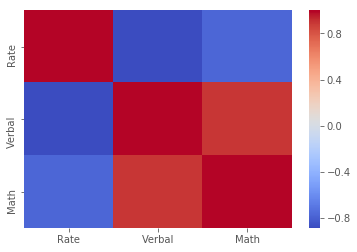

In [104]:
## Create the corresponding heatmap of corr coeff
sns.heatmap(df[['Rate','Verbal','Math']].corr(),cmap='coolwarm')  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
df.describe()

,Rate,Verbal,Math,diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


count is the number of non-NA values in column variable

mean is the average value of the values in column variable

std is the standard deviation of the values in column variable

min is the lowest numeric value of the values in column variable

25% is the 25th percentile of the values in column variable

50% is the median of the values in column variable

75% is the 7th percentile of the values in column variable

max is the highest numeric value of the values in the column variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
df.cov()
# or df[['Rate','Verbal','Math']].cov()



,Rate,Verbal,Math,diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
diff,-43.552036,27.499623,-219.931373,247.430995


#1: Corrleation matrix is easier to compare the correlation between each pair of variable as values lie between -1 and 1. 
#2 : Correlation= Cov(X,Y)(sqrt{Var(X)Var(Y)})
#3 :Correlation is unit-free measure of the relationship between variables, making it easy to compare and determine the degree and type of linear relationships between the variables

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drug = './drug-use-by-age.csv'
data = pd.read_csv(drug)
data

#check the head, tail and check for null values 
data.head() 

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3,1.1,4,0.1,5,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6,3.4,15,0.1,1,0.0,3,...,0.1,41,0.3,25.5,0.3,4.0,0.1,5,0.1,19.0
2,14,2792,18.1,5,8.7,24,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24,0.2,16.5
3,15,2956,29.2,6,14.5,25,0.5,4,0.1,9.5,...,0.8,3,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10,22.5,30,1.0,7,0.0,1,...,1.1,4,2.4,11.0,1.8,9.5,0.3,36,0.2,3.0


In [28]:
data.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52,20.8,52,3.2,5,0.4,6,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30,0.4,4.0
13,30-34,2864,77.5,52,16.4,72,2.1,8,0.5,15,...,0.9,46,3.6,8.0,1.4,12.0,0.4,54,0.4,10.0
14,35-49,7391,75.0,52,10.4,48,1.5,15,0.5,48,...,0.3,12,1.9,6.0,0.6,24.0,0.2,104,0.3,10.0
15,50-64,3923,67.2,52,7.3,52,0.9,36,0.4,62,...,0.4,5,1.4,10.0,0.3,24.0,0.2,30,0.2,104.0
16,65+,2448,49.3,52,1.2,36,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null int64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null int64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null int64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null int64
oxycontin-use              17 non-null float64
oxycontin-frequency

In [30]:
#replace - with NAN before i could convert them to floats
data.replace('-', np.NaN, inplace= True)

In [31]:
#check if - has been successfully replaced 
data['crack-frequency']

0     NaN
1       3
2     NaN
3     9.5
4       1
5      21
6      10
7       2
8       5
9      17
10      5
11      6
12      6
13     15
14     48
15     62
16    NaN
Name: crack-frequency, dtype: object

In [32]:
#replace all object type to float 
for i in ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']:
    data[i] = data[i].astype(float)

In [33]:
#all data are in interger or float except Age as some of the values exists as a range.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null int64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null int64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null int64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null int64
oxycontin-use              17 non-null float64
oxycontin-frequ

In [105]:
data[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']]

,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,5.0,NaN,35.5,19.0,24.5,NaN
1,1.0,3.0,NaN,12.0,41.0,5.0
2,5.5,NaN,2.0,5.0,4.5,24.0
3,4.0,9.5,1.0,5.5,3.0,10.5
4,7.0,1.0,66.5,3.0,4.0,36.0
5,5.0,21.0,64.0,4.0,6.0,48.0
6,5.0,10.0,46.0,4.0,7.0,12.0
7,5.5,2.0,180.0,3.0,7.5,105.0
8,8.0,5.0,45.0,4.0,12.0,12.0
9,5.0,17.0,30.0,2.0,13.5,2.0


Group 65+ has 5 NaN values in it. That means approximately 20% of the relevant column values for the row of age 65+ are NaN. To avoid affecting the data further, I have decided to drop that row.

In [109]:
data.drop(16,inplace=True, axis = 0)


KeyError: 'labels [16] not contained in axis'

In [110]:
data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3,1.1,4,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5,8.7,24,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24,33.7,52,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36,33.4,60,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48,34.0,60,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52,33.0,52,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


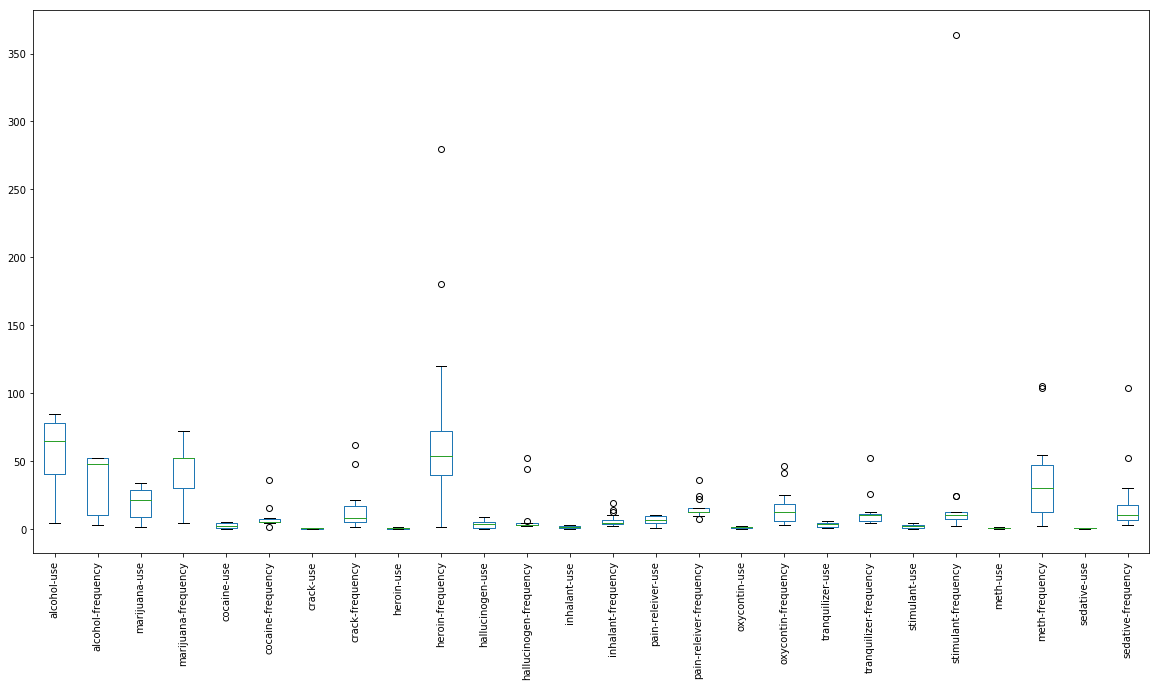

In [40]:
#There are some outliners in the data 
data.iloc[:, 2:].plot.box(figsize = (20,10), fontsize = 10, rot = 90)


In [111]:
data.shape

(16, 28)

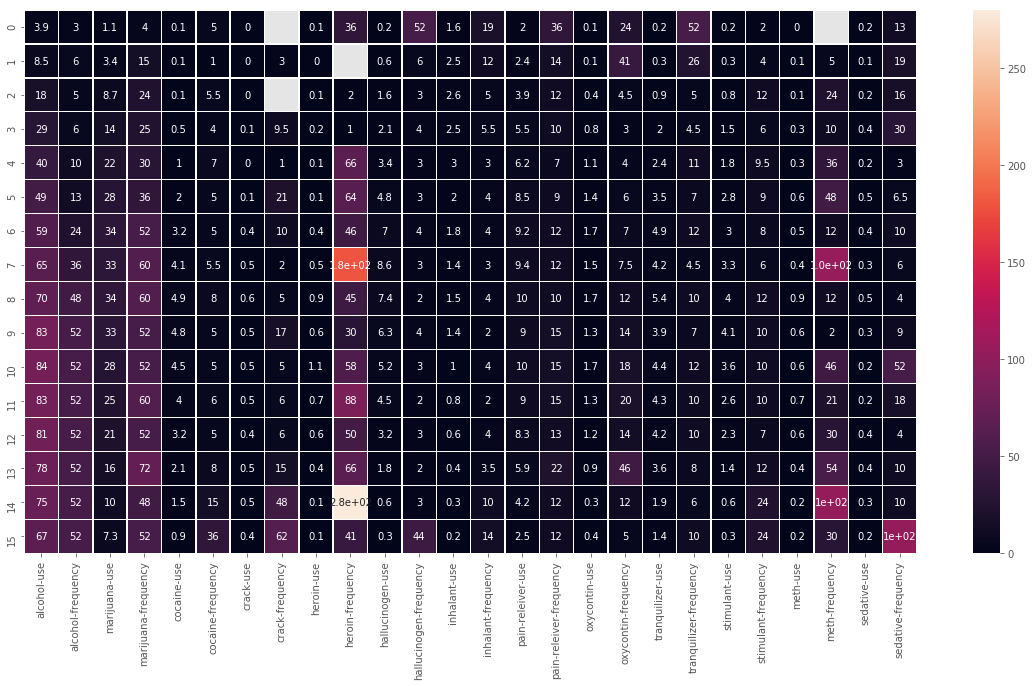

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data.iloc[:, 2:], annot = True, linewidths=.5)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [113]:
data.loc[:,'alcohol-use'::2].describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,55.812500,20.031250,2.312500,0.312500,0.375000,3.600000,1.475000,6.625000,0.993750,2.96875,2.037500,0.406250,0.300000
std,27.712401,11.415821,1.784704,0.230579,0.331662,2.747605,0.883553,2.901149,0.576737,1.67281,1.361311,0.251578,0.121106
min,3.900000,1.100000,0.100000,0.000000,0.000000,0.200000,0.200000,2.000000,0.100000,0.20000,0.200000,0.000000,0.100000
25%,37.375000,9.975000,0.800000,0.075000,0.100000,1.350000,0.750000,4.125000,0.400000,1.77500,0.750000,0.200000,0.200000
50%,65.900000,21.650000,2.050000,0.400000,0.300000,3.300000,1.450000,7.250000,1.150000,3.55000,2.050000,0.400000,0.300000
75%,78.300000,29.550000,4.025000,0.500000,0.600000,5.475000,2.125000,9.050000,1.425000,4.22500,3.075000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.40000,4.100000,0.900000,0.500000


Alcohol has the highest mean (55.8)followed by Marijuana. That means alcohol is the most widely used substance.

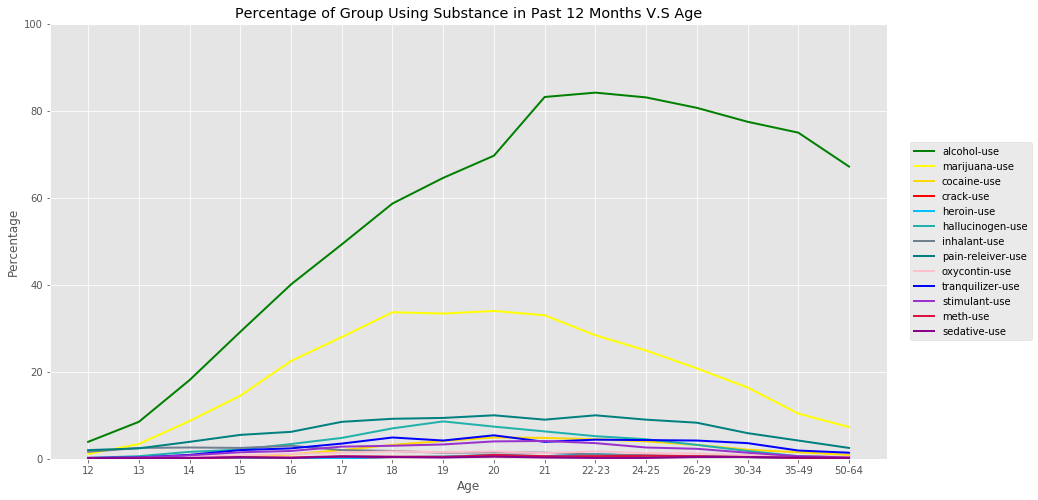

In [122]:
#line plot to see how proportion of drug users, for each drug changes across the age groups

c =['green','yellow','gold','red','deepskyblue','lightseagreen','slategray','teal','pink','blue','darkorchid','crimson','darkmagenta']

data.loc[:,'alcohol-use':'sedative-use':2].plot.line(figsize=(15,8),title = 'Percentage of Group Using Substance in Past 12 Months V.S Age',color = c,lw=2)


# Formatting the plot
plt.legend(loc='center',bbox_to_anchor=[1.1, 0.5])
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.xticks(np.arange(16),np.array(data['age']))

plt.show()

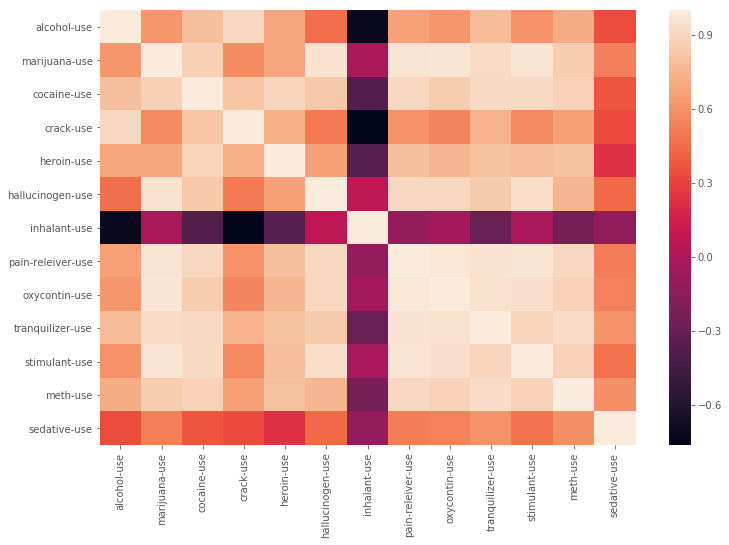

In [142]:
# Invesigate if there are any correlation between proportions between the various drugs

plt.figure(figsize=(12,8))
sns.heatmap(data.loc[:,'alcohol-use'::2].corr())

There seems to be an observable positive correlation between pain- relievers,oxycontin,tranquilizer,stimulant,meth-use. (close to 0.9, bottom right)

There is a high negative correlation belween alochol and inhalant use, inhalant and crack use. 

In [123]:
data.loc[:,'alcohol-frequency'::2].describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,16.000000,16.000000,16.000000,14.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,15.000000,16.000000
mean,32.187500,43.375000,7.875000,15.035714,70.166667,8.812500,6.156250,14.125000,14.812500,12.15625,10.343750,35.966667,19.656250
std,21.451399,18.874586,8.038449,18.111263,71.394944,15.397917,4.860448,6.721855,12.798275,11.72564,6.046263,31.974581,25.621423
min,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000,4.50000,2.000000,2.000000,3.000000
25%,9.000000,28.750000,5.000000,5.000000,38.250000,3.000000,3.375000,11.500000,5.750000,6.75000,6.750000,12.000000,6.375000
50%,42.000000,52.000000,5.250000,7.750000,50.000000,3.000000,4.000000,12.000000,12.000000,10.00000,9.750000,30.000000,10.000000
75%,52.000000,54.000000,7.250000,16.500000,66.250000,4.000000,6.625000,15.000000,18.125000,11.25000,12.000000,47.000000,17.875000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.00000,24.000000,105.000000,104.000000


Heroin has the highest mean for frequency of drug usage, followed by marijuana. 

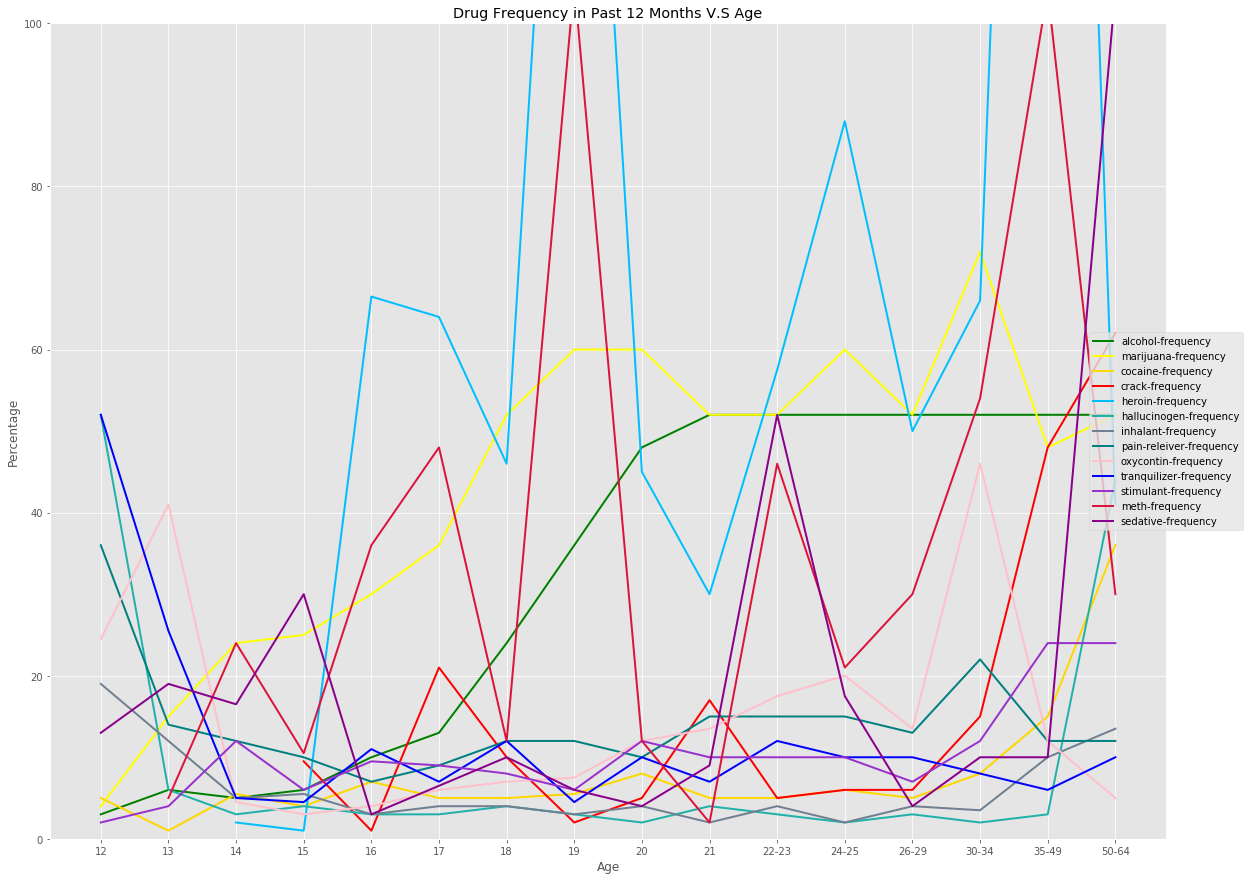

In [138]:
#line plot to see how proportion of drug users, for each drug changes across the age groups

c =['green','yellow','gold','red','deepskyblue','lightseagreen','slategray','teal','pink','blue','darkorchid','crimson','darkmagenta']

data.loc[:,'alcohol-frequency'::2].plot.line(figsize=(20,15),title = 'Drug Frequency in Past 12 Months V.S Age',color = c,lw=2)


# Formatting the plot
plt.legend(loc='center',bbox_to_anchor=[1, 0.5])
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.xticks(np.arange(16),np.array(data['age']))

plt.show()

Heroine and crack's drug freqency usage has the most diverse range between age groups. 

Individuals aged 12 seem to consume Tranquilizer, pain reliver and hallucinogen freqently. But tranquilizer, pain reliver and hallucinogen frequency dropped significantly from 12years old to 14 years old and stablized after age 14. 



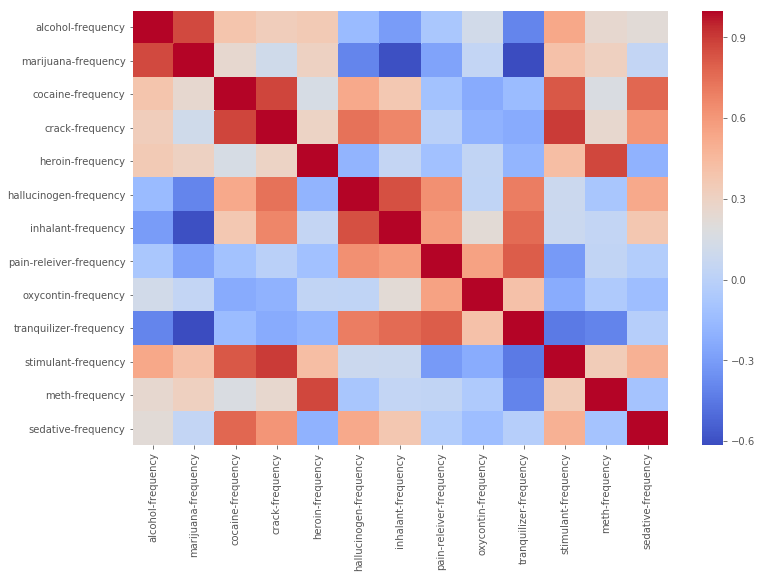

In [140]:
plt.figure(figsize=(12,8))
sns.heatmap(data.loc[:,'alcohol-frequency'::2].corr(),cmap='coolwarm')

There appears to be a cool cluster (-0.3) for pain-releiver, oxycontin, tranquilizer,cocaine,crack and heroin.

## General comments

Alcohol and Marijuana are widely used drugs across age groups. 
Marijuana users are typically younger than alcohol users.

There is a general downward trend of using alcohol/ marijuana after 21. It could be because they have graduated from school and started work. 

There seems to be an observable positive correlation between pain-relievers,oxycontin,tranquilizer,stimulant,meth-use. One possible reason could be due to pairing of such drugs during consumption. 

There is a high negative correlation belween alochol and inhalant use, inhalant and crack use. 

Individuals aged 12 seem to consume Tranquilizer, pain reliver and hallucinogen frequently. But tranquilizer, pain reliver and hallucinogen frequency dropped significantly from 12years old to 14 years old and stablized after age 14. 

There appears to be a cool cluster for pain-reliever, oxycontin, tranquilizer,cocaine,crack and heroin.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

There appears to be negative relation between alcohol and inhalant use. 

The Null Hypothesis:

H0: Alcohol and inhalant use are independant.

The Alternate Hypothesis:

H1: Alcohol and inhalant use are related.

A Chi-Square test is used to test the hypothesis, by testing the probability of independence of alcohol and inhalant use distribution among age groups.

In [144]:
# Create new dataframe for easy calling

test = data.loc[:,'alcohol-use'::2].copy()

In [147]:
# Perform chi2 test

observations = [list(data['alcohol-use']),list(data['inhalant-use'])]
chi2, p,dof,ex =stats.chi2_contingency(observations,correction=False)

In [148]:
print('Chi-Square Value = {}\nP-Value = {}\ndof = {}'.format(chi2, p, dof))

Chi-Square Value = 55.898295196083296
P-Value = 1.2606156417027251e-06
dof = 15


Since the P-value of 1.2e-06 is less than 0.05, we reject the null hypothesis. Hence, we conclude that there is sufficient evidence that alcohol and inhalant use are related.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

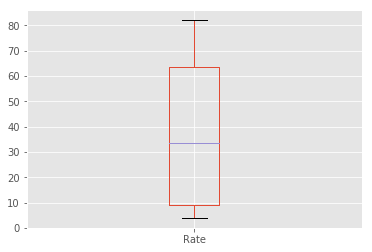

In [149]:
df[['Rate']].plot.box()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [150]:
df[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [152]:
df['Rate_percentile'] = [stats.percentileofscore(df['Rate'],x) for x in df['Rate']]

In [153]:
df[df['State']=='CA']['Rate_percentile']

23    56.730769
Name: Rate_percentile, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

C:\Users\Clare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Alcohol Frequency Distribution')

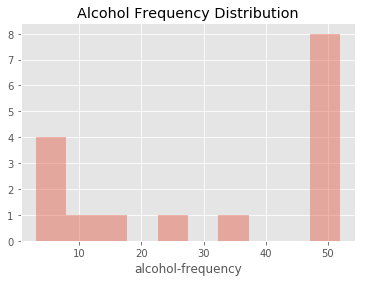

In [156]:
## Plot the distribution of a variable of your choice from the drug use dataset.

sns.distplot(data['alcohol-frequency'],bins=10,kde=False)
plt.title('Alcohol Frequency Distribution')